# Scaling and Distributing
- Scaling = All Vs in our data are scaled, but Time and Amount Classes are not
- Ditributiong = Fixing Class Imbalance by doing subsampling of equal classes


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('creditcard.csv')

 Clarrification for data transformation methods : 
- Normalization = Min max scaling, when no outliers, cannot cope with them
- Standardization = Z score normalization, when data follows gaussian distribution
- Scaling methods = Normalization AND Standardization

In [4]:
# Subsampling avoids overfitting AND getting wrong correlations
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()

df['scaled_amount'] = r_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = r_scaler.fit_transform(df['Time'].values.reshape(-1,1))

y = df['Class']
df.drop(['Amount','Time'],axis=1,inplace=True)
df.drop(['Class'],axis=1,inplace=True)
df['Class'] = y



In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960,0


In [6]:
# if we try to split data normally we get an issue but we try quand meme parce qu'on est tetue et bornee

X = df.drop(['Class'], axis = 1)
y = df['Class']


In [7]:
from sklearn.model_selection import StratifiedKFold

#using a k fold variation to make 5 splits of train and test with a balanced amount of both classes we have
s = StratifiedKFold(n_splits=5,shuffle=False,random_state=None)
s


StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [8]:
for train_ind, test_ind in s.split(X,y):
    #print("Train:", train_ind, "Test:", test_ind)
    original_Xtrain, original_Xtest = X.iloc[train_ind], X.iloc[test_ind]
    original_ytrain, original_ytest = y.iloc[train_ind], y.iloc[test_ind]
    # a chaque fois we shuffle our data to get a new fold
    print(len(original_Xtrain), len(original_Xtest))


227845 56962
227845 56962
227846 56961
227846 56961
227846 56961


In [9]:
## showing the high imbalance
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Solution s: Random under-sampling, Random over-sampling

### Not so Random Under-sampling

In [10]:
# see ration 
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
# so we will use 492 instances for both classes 
df = df.sample(frac=1) #shuffling all our data

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # on prend only same amount of fraud samples

normal_distributed_df = pd.concat([fraud_df, non_fraud_df]) # this is our balanced dataset
new_df = normal_distributed_df.sample(frac=1, random_state=42) # we shuffle our balanced dataset
new_df.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
64272,1.453187,-1.495856,-0.977913,-2.270149,0.792376,3.572262,-1.569487,0.841158,-1.570196,1.320589,...,-1.079484,0.032946,0.974958,0.471812,-0.321274,0.039857,0.024301,0.537972,-0.394730,0
123301,-1.298359,1.079671,-0.180678,1.287839,1.858273,-2.223695,0.525167,-0.096874,-0.168893,-2.544410,...,-0.851270,-0.370800,0.298242,0.442930,-0.522832,0.000105,0.135698,-0.293440,-0.091824,1
281053,-1.219123,1.489952,-0.187655,-0.475759,0.959856,-1.389524,0.876273,0.186469,-0.448640,-2.736630,...,-0.090943,-0.529271,-0.318949,1.015782,-0.381530,-0.037237,0.013648,0.062461,1.001151,0
261925,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,-2.162061,...,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,1.872424,0.887593,1
123238,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,0.013162,0.248835,-2.100667,...,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065,-0.293440,-0.092048,1


In [12]:
# Seeing distribution now 
new_df['Class'].value_counts()/len(new_df)

Class
0    0.5
1    0.5
Name: count, dtype: float64

In [13]:
## Geting outliers from the other class (fraud) 

def outliers(data, col, multiplier = 1.5):
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.50)
    Q3 = data[col].quantile(0.75)
    Q4 = data[col].quantile(1)
    
    IQR = Q3 = Q1
    
    bas = Q1 - multiplier * IQR
    haut = Q3 + multiplier * IQR
    
    outliers = data[(data[col] < bas) | (data[col] > haut)]
    
    return outliers

In [14]:
len(outliers(new_df,'V4')) / len(new_df)


1.0

In [15]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
64272,1.453187,-1.495856,-0.977913,-2.270149,0.792376,3.572262,-1.569487,0.841158,-1.570196,1.320589,...,-1.079484,0.032946,0.974958,0.471812,-0.321274,0.039857,0.024301,0.537972,-0.394730,0
123301,-1.298359,1.079671,-0.180678,1.287839,1.858273,-2.223695,0.525167,-0.096874,-0.168893,-2.544410,...,-0.851270,-0.370800,0.298242,0.442930,-0.522832,0.000105,0.135698,-0.293440,-0.091824,1
281053,-1.219123,1.489952,-0.187655,-0.475759,0.959856,-1.389524,0.876273,0.186469,-0.448640,-2.736630,...,-0.090943,-0.529271,-0.318949,1.015782,-0.381530,-0.037237,0.013648,0.062461,1.001151,0
261925,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,-2.162061,...,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,1.872424,0.887593,1
123238,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,0.013162,0.248835,-2.100667,...,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065,-0.293440,-0.092048,1


In [16]:
# Here i am going to create a balanced dataset in which : the 492 instances of no fraud have no extreme outliers, this will help our model train well on no fraud data


In [17]:
def create_balanced_dataset(df, target_size=492, outlier_removal_func=None, random_state=None):
    df = df.sample(frac=1, random_state=random_state)

    fraud_df = df[df['Class'] == 1]
    non_fraud_df = df[df['Class'] == 0]

    balanced_df = pd.DataFrame(columns=df.columns)

    fraud_df = fraud_df[:target_size]
    balanced_df = pd.concat([balanced_df, fraud_df])

    min_outliers = float('inf')
    best_batch = None
    for i in range(0, len(non_fraud_df), target_size):
        non_fraud_df = non_fraud_df.sample(frac=1, random_state=random_state)
        non_fraud_batch = non_fraud_df[i:i+target_size]

        num_outliers = 0
        if outlier_removal_func:
            for col in df.columns[:-1]:  # Exclude 'Class' column
                non_fraud_outliers_removed = outlier_removal_func(df, col)
                num_outliers += len(non_fraud_outliers_removed.index)

        if num_outliers < min_outliers:
            min_outliers = num_outliers
            best_batch = non_fraud_batch

    balanced_df = pd.concat([balanced_df, best_batch])

    balanced_df = balanced_df.sample(frac=1, random_state=random_state)

    return balanced_df

In [18]:
balanced_dataset = create_balanced_dataset(new_df, target_size=492, outlier_removal_func=outliers, random_state=42)
balanced_dataset.reset_index(drop=True, inplace=True)

C:\Users\Rania\AppData\Local\Temp\ipykernel_27364\916350335.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_df = pd.concat([balanced_df, fraud_df])


In [19]:
len(outliers(balanced_dataset,'V4')) / len(balanced_dataset)
# we have snot ignificantly reduced outliers proportion in dataset lol

1.0

C:\Users\Rania\AppData\Local\Temp\ipykernel_27364\692864827.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Class', data=new_df, palette='Blues')


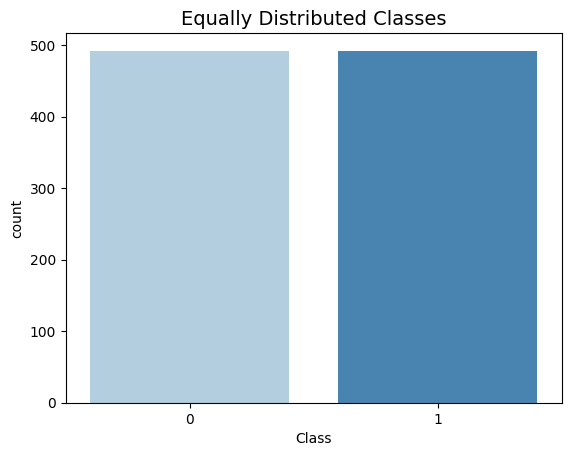

In [20]:
sns.countplot(x = 'Class', data=new_df, palette='Blues')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [21]:
new_df.to_csv('under_sampled.csv', index=False)


In [22]:
df.to_csv('creditcard_scaled.csv')

In [23]:
len(new_df) # 492*2 for 2 classes

984

### Not so Random Over-sampling

In [24]:
# PS : this method creates synthetic data so we should do it during cross valisation to avoid data leakage
'''
ET DU COUP THIS WILL BE INCLUDED WHEN TRAINING OUR MODELS IN NOTEBOOK PREDICITON
'''

'\nET DU COUP THIS WILL BE INCLUDED WHEN TRAINING OUR MODELS IN NOTEBOOK PREDICITON\n'